# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (`df.rename()`, `df.drop()`) 
* Manipulate the index in DataFrames (`df.reindex()`, `df.drop()`, `df.rename()`) 
* Manipulate column datatypes 

## Let's get started!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('turnstile_180901.txt')
print(df.shape)
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Rename all the columns to lower case

In [3]:
# Your code here
def lower_case(x):
    return x.lower()


df = df.rename(mapper=lower_case, axis=1)
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Change the Index to be the Line Names

In [4]:
#Your code here

df = df.set_index('linename')
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Remove the index

In [5]:
# Your code here
df = df.reset_index(level='linename')


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order
*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [6]:
# Create new column 'num_lines' based on number of trains in each 'linename'
df['Num_Lines'] = df.linename.map(lambda x: len(x))
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,7
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,7
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,7
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,7
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,7


## Write a function to clean a column name

In [26]:
def clean(col_name):
    stripped = col_name.strip()
    cleaned = stripped.capitalize()
    return cleaned

In [27]:
# This is a list comprehension. It applies your clean function to every item in the list.
# We then reassign that to df.columns
# You shouldn't have to change anything here.
# Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [28]:
# Checking the output, we can see the results.
df.columns

Index(['Linename', 'C/a', 'Unit', 'Scp', 'Station', 'Division', 'Date', 'Time',
       'Desc', 'Entries', 'Exits', 'Num_lines', 'Day_of_week'],
      dtype='object')

## Group the Data by Day of Week and Plot the Sum of The Numeric Columns

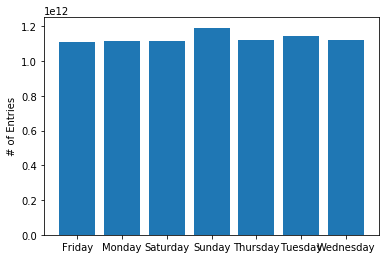

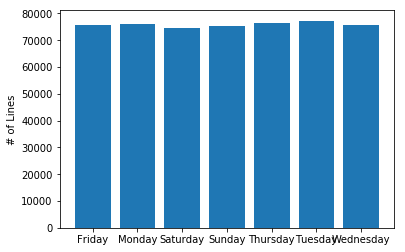

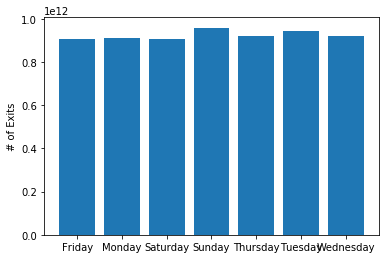

In [30]:
# Convert 'Date' to datetime
df.Date = pd.to_datetime(df.Date, format = '%m/%d/%Y')

# Create New column for day of the week
df['Day_of_Week'] = df.Date.dt.day_name()
df.head()

# Reset index of df and plot results
day_counts = df.groupby('Day_of_Week').sum()
day_counts = day_counts.reset_index()

plt.bar(day_counts['Day_of_Week'], day_counts['Entries'])
plt.ylabel('# of Entries')
plt.show()

plt.bar(day_counts['Day_of_Week'], day_counts['Num_lines'])
plt.ylabel('# of Lines')
plt.show()

plt.bar(day_counts['Day_of_Week'], day_counts['Exits'])
plt.ylabel('# of Exits')
plt.show()

## Group the Data by Weekend/Weekday and Plot the Sum of the Numeric Columns

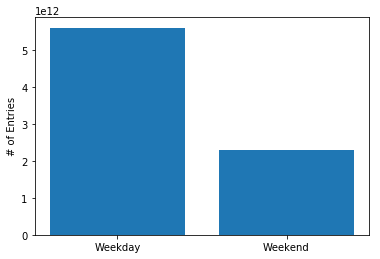

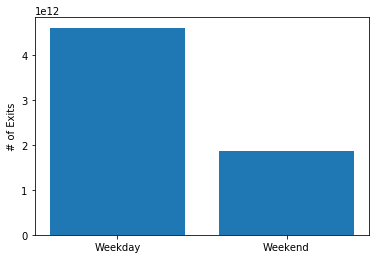

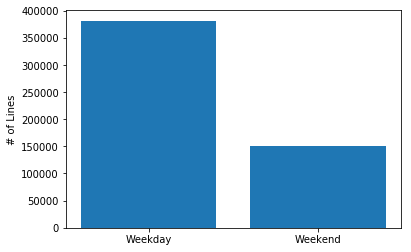

In [48]:
# Create new column indicating weekday/weekend by mapping day of week onto new column
day_counts['Weekday_weekend'] = day_counts.Day_of_Week.map(
    {'Sunday': 'Weekend', 'Monday': 'Weekday', 'Tuesday': 'Weekday', 'Wednesday': 'Weekday', 'Thursday': 'Weekday', 'Friday': 'Weekday', 'Saturday': 'Weekend'})
day_counts

# Create new dataframe with numerical categories sorted by weekday/weekend sums
wkend_wkday = day_counts.groupby('Weekday_weekend').sum()
wkend_wkday = wkend_wkday.reset_index()
wkend_wkday

# Plot 1
plt.bar(wkend_wkday['Weekday_weekend'], wkend_wkday['Entries'])
plt.ylabel('# of Entries')
plt.show()

# Plot 2
plt.bar(wkend_wkday['Weekday_weekend'], wkend_wkday['Exits'])
plt.ylabel('# of Exits')
plt.show()

# Plot 3
plt.bar(wkend_wkday['Weekday_weekend'], wkend_wkday['Num_lines'])
plt.ylabel('# of Lines')
plt.show()

## Analysis Question: 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
# They do not say anything about specific days of the week - there are more days during the week than on the weekend

## Drop a couple of columns

In [53]:
df.drop(columns=['C/a', 'Desc'])


,Linename,Unit,Scp,Station,Division,Date,Time,Entries,Exits,Num_lines,Day_of_week,Day_of_Week,Wkend_wkday
0,NQR456W,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,6736067,2283184,7,Saturday,Saturday,None
1,NQR456W,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,6736087,2283188,7,Saturday,Saturday,None
2,NQR456W,R051,02-00-00,59 ST,BMT,2018-08-25,08:00:00,6736105,2283229,7,Saturday,Saturday,None
3,NQR456W,R051,02-00-00,59 ST,BMT,2018-08-25,12:00:00,6736180,2283314,7,Saturday,Saturday,None
4,NQR456W,R051,02-00-00,59 ST,BMT,2018-08-25,16:00:00,6736349,2283384,7,Saturday,Saturday,None
5,NQR456W,R051,02-00-00,59 ST,BMT,2018-08-25,20:00:00,6736562,2283425,7,Saturday,Saturday,None
6,NQR456W,R051,02-00-00,59 ST,BMT,2018-08-26,00:00:00,6736683,2283460,7,Sunday,Sunday,None
7,NQR456W,R051,02-00-00,59 ST,BMT,2018-08-26,04:00:00,6736696,2283461,7,Sunday,Sunday,None
8,NQR456W,R051,02-00-00,59 ST,BMT,2018-08-26,08:00:00,6736705,2283483,7,Sunday,Sunday,None
9,NQR456W,R051,02-00-00,59 ST,BMT,2018-08-26,12:00:00,6736746,2283524,7,Sunday,Sunday,None


## Summary

Great! You practiced your data cleanup skills using Pandas.